This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock <br>
price of a corporation (Apple Inc.) using the past 60 day stock price.

Importing the libraries

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Get the stock quote

In [2]:
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2022-10-31')
# Show the data
df # df - data frame

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,24.839491
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.603205
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.910095
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.912338
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.247648
...,...,...,...,...,...,...
2022-10-25,152.490005,149.360001,150.089996,152.339996,74732300.0,152.087708
2022-10-26,151.990005,148.039993,150.960007,149.350006,88194300.0,149.102661
2022-10-27,149.050003,144.130005,148.070007,144.800003,109180200.0,144.560196


Get the number of rows and columns in the data set

In [3]:
df.shape

(1973, 6)

Visualize the closing price history

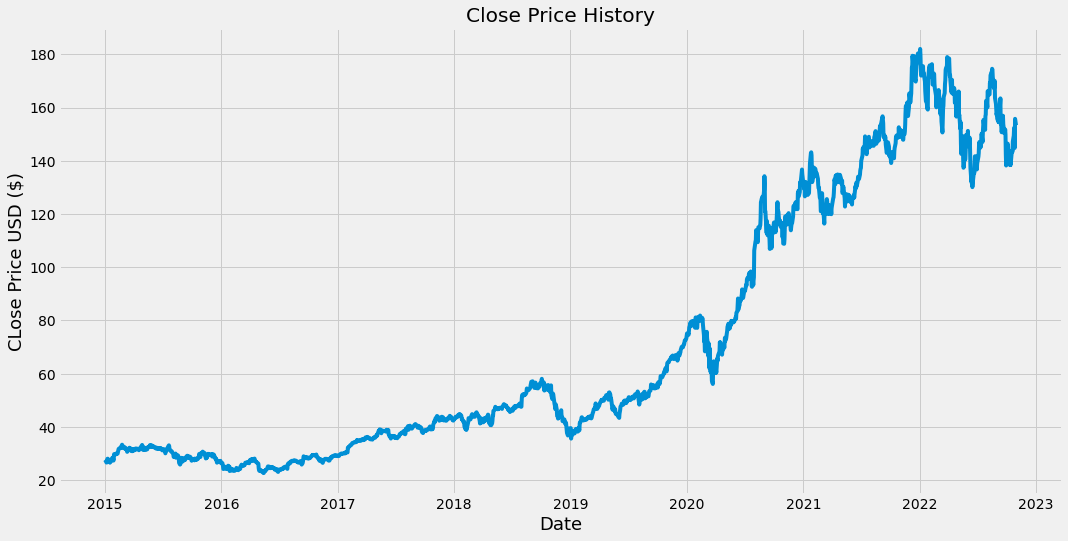

In [4]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('CLose Price USD ($)', fontsize=18)
plt.show()

Create a new dataframe with only the 'Close' column

In [5]:
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train our LSTM model on
training_data_len = math.ceil(len(dataset) * .8)  # Training model on 80% of dataset
training_data_len

1579

Scale the data

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))  # 0 and 1 inclusive
scaled_data = scaler.fit_transform(dataset)

In [7]:
scaled_data

array([[0.03142544],
       [0.0297789 ],
       [0.02494904],
       ...,
       [0.76659876],
       [0.83522039],
       [0.82016623]])

Create the training dataset<br>
Create the scaled training dataset

In [8]:
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []  # Independent training variables/ features
y_train = []  # Dependent target variables

In [9]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03142544, 0.0297789 , 0.02494904, 0.02496473, 0.02730125,
       0.03379333, 0.03398151, 0.02965345, 0.03117454, 0.03051593,
       0.02584288, 0.02454132, 0.02882234, 0.03012389, 0.03459308,
       0.0355026 , 0.03569077, 0.02948095, 0.03915635, 0.04478596,
       0.04205741, 0.04436256, 0.04439393, 0.04582092, 0.04641682,
       0.044833  , 0.04607183, 0.04967853, 0.0541634 , 0.05664106,
       0.05761331, 0.05878941, 0.06018505, 0.05976165, 0.06140819,
       0.06689667, 0.06559511, 0.06029481, 0.06285087, 0.05977734,
       0.06076525, 0.06118866, 0.05990277, 0.05656266, 0.0568606 ,
       0.05770739, 0.0535832 , 0.05002353, 0.0534891 , 0.05214051,
       0.05427317, 0.05755058, 0.05979302, 0.05827192, 0.05576291,
       0.05781716, 0.05700174, 0.0518112 , 0.0531598 , 0.05160735])]
[0.056499933265228286]

[array([0.03142544, 0.0297789 , 0.02494904, 0.02496473, 0.02730125,
       0.03379333, 0.03398151, 0.02965345, 0.03117454, 0.03051593,
       0.02584288, 0.02454132, 0.0

Convert the x_train and y_train to numpy arrays

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

Reshape the data to get a 3-dimensional shape for LSTM network

In [11]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1519, 60, 1)

Build the LSTM model

In [12]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25)) # Densely connected neural network with 25 neurons
model.add(Dense(1))

Compile the model

In [13]:
model.compile(optimizer='adam', loss='mean_squared_error')  # Loss function is used to measure how well the model did on training

Train the model

In [14]:
model.fit(x_train, y_train, batch_size=1, epochs=1)  # Epochs is the number of iterations when an entire dataset is passed forward and backward through a neural network

1519/1519 [==============================] - 87s 47ms/step - loss: 0.0035


Create the testing dataset<br>
Create a new array containing scaled values from index 1519 to 1973

In [15]:
test_data = scaled_data[training_data_len-60: , :]

Create the datasets x_test and y_test

In [16]:
x_test = []
y_test = dataset[training_data_len: , :]  # All the values we want our model to predict
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

Convert the data to a numpy array

In [17]:
x_test = np.array(x_test)

Reshape the model

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Get the model's predicted price values

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

Get the root mean squared error (RMSE) --> good measure of how accurate the model predicts the response and is the standard deviation of the residuals and the lower rmse values indicate a better fit

In [20]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.3096516023432543

Plot the data

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

<ipython-input-21-8f78faa8f9ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


Visualise the data

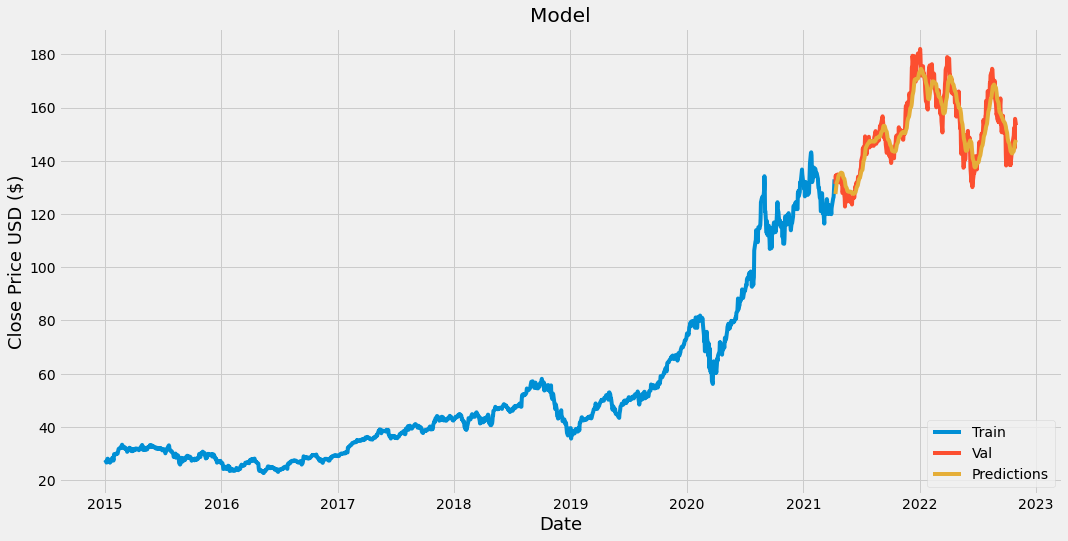

In [22]:
plt.figure(figsize = (16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

Get the quote

In [23]:
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end='2022-10-31')

Create a new dataframe

In [24]:
new_df = apple_quote.filter(['Close'])

Get the last 60 day closing price values and convert the dataframe to an array

In [25]:
last_60_days = new_df[-60:].values

Scale the data to be values between 0 and 1

In [26]:
last_60_days_scaled = scaler.transform(last_60_days)

Create an empty list

In [27]:
X_test = []

Append past 60 days to X_test

In [28]:
X_test.append(last_60_days_scaled)

onvert the X_test dataset to numpy array

In [29]:
X_test = np.array(X_test)

Reshape the data

In [30]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

Get the predicted scaled price

In [31]:
pred_price = model.predict(X_test)

Undo the scaling

In [32]:
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)  # Will show the predicted price for 1st Nov, 2022

[[148.77356]]


Get the quote

In [33]:
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-11-01', end='2022-11-01')
print(apple_quote2['Close'])

Date
2022-10-31    153.339996
2022-11-01    150.649994
Name: Close, dtype: float64
